## 10. Parametric Inference

**Parametric models** are of the form

$$ \mathfrak{F} = \bigg\{ f(x; \theta) : \; \theta \in \Theta \bigg\} $$

where $\Theta \subset \mathbb{R}^k$ is the parameter space and $\theta = (\theta_1, \dots, \theta_k)$ is the parameter.  The problem of inference then reduces to the problem of estimating parameter $\theta$.

### 10.1 Parameter of interest

Often we are only interested in some function $T(\theta)$.  For example, if $X \sim N(\mu, \sigma^2)$ then the parameter is $\theta = (\mu, \sigma)$.  If our goal is to estimate $\mu$ then $\mu = T(\theta)$ is called the **parameter of interest** and $\sigma$ is called  a **nuisance parameter**.

### 10.2 The Method of Moments

Suppose that the parameter $\theta = (\theta_1, \dots, \theta_n)$ has $k$ components.  For $1 \leq j \leq k$ define the $j$-th **moment**

$$ \alpha_j \equiv \alpha_j(\theta) = \mathbb{E}_\theta(X^j) = \int x^j dF_\theta(x)$$

and the $j$-th **sample moment**

$$ \hat{\alpha}_j = \frac{1}{n} \sum_{i=1}^n X_i^j $$

The **method of moments estimator** $\hat{\theta}_n$ is defined to be the value of $\theta$ such that

$$
\begin{align}
\alpha_1(\hat{\theta}_n) &= \hat{\alpha_1} \\
\alpha_2(\hat{\theta}_n) &= \hat{\alpha_2} \\
\vdots \\
\alpha_k(\hat{\theta}_n) &= \hat{\alpha_k}              
\end{align}
$$

This defines a system of $k$ equations with $k$ unknowns.

**Theorem 10.6**.  Let $\hat{\theta}_n$ denote the method of moments estimator.  Under the conditions given in the appendix, the following statements hold:

(1) The estimate $\hat{\theta}_n$ exists with probability tending to 1.

(2) The estimate is consistent: $\hat{\theta}_n \xrightarrow{\text{P}} \theta$.

(3) The estimate is asymptotically Normal:

$$\sqrt{n}(\hat{\theta}_n - \theta) \leadsto N(0, \Sigma) $$

where

$$
\Sigma = g \mathbb{E}_\theta (Y Y^T) g^T \\
Y = (X, X^2, \dots, X^k)^T, \quad g = (g_1, \dots, g_k) \quad \text{and} \quad g_j = \partial \alpha_j^{-1}(\theta)/\partial\theta
$$

The last statement in Theorem 10.6 can be used to find standard errors and confidence intervals.  However, there is an easier way: the bootstrap.

### 10.3 Maximum Likelihood

Let $X_1, \dots, X_n$ be iid with PDF $f(x; \theta)$.

The **likelihood function** is defined by 

$$ \mathcal{L}_n(\theta) = \prod_{i=1}^n f(X_i; \theta) $$

The **log-likelihood function** is defined by $\ell_n(\theta) = \log \mathcal{L}_n(\theta)$.

The likelihood function is just the joint density of the data, except we treat is as a function of parameter $\theta$.  Thus $\mathcal{L}_n : \Theta \rightarrow [0, \infty)$.  The likelihood function is not a density function; in general it is not true that $\mathcal{L}_n$ integrates to 1.

The **maximum likelihood estimator** MLE, denoted by $\hat{\theta}_n$, is the value of $\theta$ that maximizes $\mathcal{L}_n(\theta)$.

The maximum of $\ell_n(\theta)$ occurs at the same place as the maximum of $\mathcal{L}_n(\theta)$, so maximizing either leads to the same answer.  Often it's easier to maximize the log-likelihood.

In [1]:
%load_ext rpy2.ipython

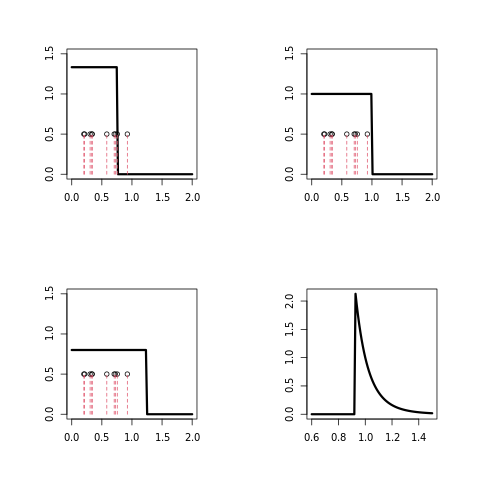

In [5]:
%%R
### Figure 9.2

n = 10
x = runif(n)
m = 100

par(mfrow=c(2,2),pty="s")
f    = rep(0,m)
grid = seq(0,2,length=m)
f[grid < .75] = 1/.75
plot(grid,f,type="l",ylim=c(0,1.5),xlab="",ylab="",lwd=3,cex.lab=1.5)
points(x,rep(.5,n))
for(i in 1:n){
     lines(c(x[i],x[i]),c(0,.5),lty=2,col=2)
     }


f    = rep(0,m)
grid = seq(0,2,length=m)
f[grid < 1] = 1
plot(grid,f,type="l",ylim=c(0,1.5),xlab="",ylab="",lwd=3,cex.lab=1.5)
points(x,rep(.5,n))
for(i in 1:n){
     lines(c(x[i],x[i]),c(0,.5),lty=2,col=2)
     }

f    = rep(0,m)
grid = seq(0,2,length=m)
f[grid < 1.25] = 1/1.25
plot(grid,f,type="l",ylim=c(0,1.5),xlab="",ylab="",lwd=3,cex.lab=1.5)
points(x,rep(.5,n))
for(i in 1:n){
     lines(c(x[i],x[i]),c(0,.5),lty=2,col=2)
     }

theta = seq(.6,1.5,length=m)     
lik   = rep(0,m)
lik   = 1/theta^n
lik[theta < max(x)] =0
plot(theta,lik,type="l",lwd=3,xlab="",ylab="",
     cex.lab=1.5)

### 10.4 Properties of Maximum Likelihood Estimators

Under certain conditions on the model, the MLE $\hat{\theta}_n$ possesses many properties that make it an appealing choice of estimator.

The main properties of the MLE are:

- It is **consistent**: $\hat{\theta}_n \xrightarrow{\text{P}} \theta_*$, where $\theta_*$ denotes the true value of parameter $\theta$.
- It is **equivariant**: if $\hat{\theta}_n$ is the MLE of $\theta$ then $g(\hat{\theta}_n)$ is the MLE of $g(\theta)$.
- If is **asymptotically Normal**: $\sqrt{n}(\hat{\theta} - \theta_*) / \hat{\text{se}} \leadsto N(0, 1)$ where $\hat{\text{se}}$ can be computed analytically.
- It is **asymptotically optimal** or **efficient**: roughly, this means that among all well behaved estimators, the MLE has the smallest variance, at least for large samples.
- The MLE is approximately the Bayes estimator.

### 10.5 Consistency of Maximum Likelihood Estimator

If $f$ and $g$ are PDFs, define the **Kullback-Leibler distance** between $f$ and $g$ to be:

$$ D(f, g) = \int f(x) \log \left( \frac{f(x)}{g(x)} \right) dx $$

It can be shown that $D(f, g) \geq 0$ and $D(f, f) = 0$.  For any $\theta, \psi \in \Theta$ write $D(\theta, \psi)$ to mean $D(f(x; \theta), f(x; \psi))$.  We will assume that $\theta \neq \psi$ implies $D(\theta, \psi) > 0$.

Let $\theta_*$ denote the true value of $\theta$.  Maximizing $\ell_n(\theta)$ is equivalent to maximizing

$$M_n(\theta) = \frac{1}{n} \sum_i \log \frac{f(X_i; \theta)}{f(X_i; \theta_*)}$$

By the law of large numbers, $M_n(\theta)$ converges to:

$$
\begin{align}
\mathbb{E}_{\theta_*} \left( \log \frac{f(X_i; \theta)}{f(X_i; \theta_*)} \right)
& = \int \log \left( \frac{f(x; \theta)}{f(x; \theta_*)} \right) f(x; \theta_*) dx \\
& = - \int \log \left( \frac{f(x; \theta_*)}{f(x; \theta)} \right) f(x; \theta_*) dx \\
&= -D(\theta_*, \theta)
\end{align}
$$

Hence $M_n(\theta) \approx -D(\theta_*, \theta)$ which is maximized at $\theta_*$, since the KL distance is 0 when $\theta_* = \theta$ and positive otherwise.  Hence, we expect that the maximizer will tend to $\theta_*$.

To prove this formally, we need more than $M_n(\theta) \xrightarrow{\text{P}} -D(\theta_*, \theta)$.  We need this convergence to be uniform over $\theta$.  We also have to make sure that the KL distance is well-behaved.  Here are the formal details.

**Theorem 10.13**.  Let $\theta_*$ denote the true value of $\theta$.  Define

$$M_n(\theta) = \frac{1}{n} \sum_i \log \frac{f(X_i; \theta)}{f(X_i; \theta_*)}$$

and $M(\theta) = -D(\theta_*, \theta)$.  Suppose that

$$ \sup _{\theta \in \Theta} |M_n(\theta) - M(\theta)| \xrightarrow{\text{P}} 0 $$

and that, for every $\epsilon > 0$,

$$ \sup _{\theta : |\theta - \theta_*| \geq \epsilon} M(\theta) < M(\theta_*)$$

Let $\hat{\theta}_n$ denote the MLE.  Then $\hat{\theta}_n \xrightarrow{\text{P}} \theta_*$.

### 10.6 Equivalence of the MLE

**Theorem 10.14**.  Let $\tau = g(\theta)$ be a one-to-one function of $\theta$.  Let $\hat{\theta}_n$ be the MLE of $\theta$.  Then $\hat{\tau}_n = g(\hat{\theta}_n)$ is the MLE of $\tau$.

**Proof**.  Let $h = g^{-1}$ denote the inverse of $g$.  Then $\hat{\theta}_n = h(\hat{\tau}_n)$.  For any $\tau$, $L(\tau) = \prod_i f(x_i; h(\tau)) = \prod_i f(x_i; \theta) = \mathcal{L}(\theta)$ where $\theta = h(\tau)$.  Hence, for any $\tau$, $\mathcal{L}_n(\tau) = \mathcal{L}(\theta) \leq \mathcal{L}(\hat{\theta}) = \mathcal{L}_n(\hat{\tau})$. 

### 10.7 Asymptotic Normality

The **score function** is defined to be

$$ s(X; \theta) = \frac{\partial \log f(X; \theta)}{\partial \theta} $$

The **Fisher information** is defined to be

$$
\begin{align}
I_n(\theta) &= \mathbb{V}_\theta \left( \sum_{i=1}^n s(X_i; \theta) \right) \\
&= \sum_{i=1}^n \mathbb{V}_\theta(s(X_i; \theta))
\end{align}
$$

For $n = 1$ we sometimes write $I(\theta)$ instead of $I_1(\theta)$.

It can be shown that $\mathbb{E}_\theta(s(X; \theta)) = 0$.  It then follows that $\mathbb{V}_\theta(s(X; \theta)) = \mathbb{E}_\theta((s(X; \theta))^2)$.  A further simplification of $I_n(\theta)$ is given in the next result.  
Note that $\displaystyle 0\leq \mathcal{I}(\theta)$. A random variable carrying high Fisher information implies that the absolute value of the score is often high. The Fisher information is not a function of a particular observation, as the random variable X has been averaged out.

**Theorem 10.17**.

$$ I_n(\theta) = n I(\theta)$$

$$
\begin{align}
I(\theta) & = \mathbb{E}_\theta \left( \frac{\partial \log f(X; \theta)}{\partial \theta} \right)^2 \\
&= \int \left( \frac{\partial \log f(x; \theta)}{\partial \theta} \right)^2 f(x; \theta) dx
\end{align}
$$

If $\log f(x; \theta)$ is twice differentiable with respect to $\theta$, and under certain regularity conditions, then the Fisher information may also be written as $$
\begin{align}
I(\theta) & = -\mathbb{E}_\theta \left( \frac{\partial^2 \log f(X; \theta)}{\partial \theta^2} \right) \\
&= -\int \left( \frac{\partial^2 \log f(x; \theta)}{\partial \theta^2} \right) f(x; \theta) dx
\end{align}
$$

**Theorem 10.18 (Asymptotic Normality of the MLE)**.  Under appropriate regularity conditions, the following hold:

(1)  Let $\text{se} = \sqrt{1 / I_n(\theta)}$.  Then,

$$ \frac{\hat{\theta}_n - \theta}{\text{se}} \leadsto N(0, 1) $$

(2) Let $\hat{\text{se}} = \sqrt{1 / I_n(\hat{\theta}_n)}$.  Then,

$$ \frac{\hat{\theta}_n - \theta}{\hat{\text{se}}} \leadsto N(0, 1) $$

The first statement says that $\hat{\theta}_n \approx N(\theta, \text{se})$.  The second statement says that this is still true if we replace the standard error $\text{se}$ by its estimated standard error $\hat{\text{se}}$.

Informally this says that the distribution of the MLE can be approximated with $N(\theta, \hat{\text{se}})$.  From this fact we can construct an asymptotic confidence interval.

**Theorem 10.19**.  Let

$$ C_n = \left( \hat{\theta_n} - z_{\alpha/2} \hat{\text{se}}, \; \hat{\theta_n} + z_{\alpha/2} \hat{\text{se}} \right) $$

Then, $\mathbb{P}_\theta(\theta \in C_n) \rightarrow 1 - \alpha$ as $n \rightarrow \infty$.

**Proof**  Let $Z$ denote a standard random variable.  Then,

$$
\begin{align}
\mathbb{P}_\theta(\theta \in C_n) 
&= \mathbb{P}_\theta(\hat{\theta}_n - z_{\alpha/2} \hat{\text{se}} \leq \theta \leq \hat{\theta}_n + z_{\alpha/2} \hat{\text{se}}) \\
&= \mathbb{P}_\theta(-z_{\alpha/2} \leq \frac{\hat{\theta}_n - \theta}{\hat{\text{se}}} \leq z_{\alpha/2}) \\
&\rightarrow \mathbb{P}(-z_{\alpha/2} \leq Z \leq z_{\alpha/2}) = 1 - \alpha
\end{align}
$$

Let $X$ be a Bernoulli trial. The Fisher information contained in $X$ may be calculated to be
$$
\begin{align}
I(\theta) & = -\mathbb{E} \left( \frac{\partial^2 \log \left(\theta^X(1-\theta)^{(1-X)}\right)}{\partial \theta^2} \right) \\
&= -\mathbb{E} \left( \frac{\partial^2}{\partial \theta^2} \left[X\log \theta+(1-X)\log(1-\theta)\right] \right) \\
&=\mathbb{E}\left[\frac{X}{\theta^2}+\frac{1-X}{(1-\theta)^2}\right] \\
&=\frac{\theta}{\theta^2}+\frac{1-\theta}{(1-\theta)^2}\\
&=\frac{1}{\theta(1-\theta)}\\
\end{align}
$$


Because Fisher information is additive, the Fisher information contained in $n$ independent Bernoulli trials is therefore
$$I(\theta)=\frac{n}{\theta(1-\theta)}$$
Hence $$\hat{\text{se}}=\frac{1}{\sqrt{I_n(\hat{\theta})}}=\sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}}$$
An approximate 95% confidence inteval is $$\hat{\theta}_n\pm2\sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}}$$

Let $X$ be a Normal trial. 
The log-likelihood is $$\ell(\sigma)=-n\log\sigma-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2$$
Let $$\ell'(\sigma)=-n\frac{1}{\sigma}+\frac{1}{\sigma^3}\sum_{i=1}^{n}(x_i-\mu)^2=0$$ get $$\hat{\sigma}=\sqrt{\frac{\sum_{i=1}^{n}(x_i-\mu)^2}{n}}$$
To get the Fisher information ,
$$\log f(X;\sigma)=-\log\sigma-\frac{(X-\mu)^2}{2\sigma^2}$$
with $$\frac{\partial^2\log f(X;\sigma)}{\partial^2\sigma}=\frac{1}{\sigma^2}-\frac{3(X-\mu)^2}{\sigma^4}$$
and hence 
$$
\begin{align}
I(\theta) & = -\mathbb{E} \left( \frac{1}{\sigma^2}-\frac{3(X-\mu)^2}{\sigma^4} \right) \\
&=-\frac{1}{\sigma^2}+\frac{3\sigma^2}{\sigma^4}\\
&=\frac{2}{\sigma^2}
\end{align}
$$

Hence $$\hat{\text{se}}=\frac{1}{\sqrt{I_n(\hat{\theta})}}=\frac{\hat{\sigma}_n}{\sqrt{2n}}$$

### 10.8 Optimality

Suppose that $X_1, \dots, X_n \sim N(0, \sigma^2)$.  The MLE is $\hat{\theta}_n = \overline{X}_n$.  Another reasonable estimator is the sample median $\overline{\theta}_n$.  The MLE satisfies

$$ \sqrt{n}(\hat{\theta}_n - \theta) \leadsto N(0, \sigma^2) $$

It can be proved that the median satisfies

$$ \sqrt{n}(\overline{\theta}_n - \theta) \leadsto N\left(0, \sigma^2 \frac{\pi}{2} \right) $$

This means that the median converges to the right value but has a larger variance than the MLE.

More generally, consider two estimators $T_n$ and $U_n$ and suppose that

$$
\sqrt{n}(T_n - \theta) \leadsto N(0, t^2) 
\quad \text{and} \quad 
\sqrt{n}(U_n - \theta) \leadsto N(0, u^2)
$$

We define the **asymptotic relative efficiency** of U to T by $ARE(U, T) = t^2/u^2$.  In the Normal example, $ARE(\overline{\theta}_n, \hat{\theta}_n) = 2 / \pi = 0.63$.

**Theorem 10.23**.  If $\hat{\theta}_n$ is the MLE and $\widetilde{\theta}_n$ is any other estimator then

$$ ARE(\widetilde{\theta}_n, \hat{\theta}_n) \leq 1 $$

Thus, MLE has the smallest (asymptotic) variance and we say that MLE is **efficient** or **asymptotically optimal**.

The result is predicated over the model being correct -- otherwise the MLE may no longer be optimal.

### 10.9 The Delta Method

Let $\tau = g(\theta)$ where $g$ is a smooth function.  The maximum likelihood estimator of $\tau$ is $\hat{\tau} = g(\hat{\theta})$.

**Theorem 10.24 (The Delta Method)**.  If $\tau = g(\theta)$ where $g$ is differentiable and $g'(\theta) \neq 0$ then

$$ \frac{\sqrt{n}(\hat{\tau}_n - \tau)}{\hat{\text{se}}(\hat{\tau})} \leadsto N(0, 1) $$

where $\hat{\tau}_n = g(\hat{\theta})$ and

$$ \hat{\text{se}}(\hat{\tau}_n) = |g'(\hat{\theta})| \hat{\text{se}} (\hat{\theta}_n) $$

Hence, if

$$ C_n = \left( \hat{\tau}_n - z_{\alpha/2} \hat{\text{se}}(\hat{\tau}_n), \; \hat{\tau}_n + z_{\alpha/2} \hat{\text{se}}(\hat{\tau}_n) \right) $$

then $\mathbb{P}_\theta(\tau \in C_n) \rightarrow 1 - \alpha$ as $n \rightarrow \infty$.

### 10.10 Multiparameter Models

We can extend these ideas to models with several parameters.

Let $\theta = (\theta_1, \dots, \theta_n)$ and let $\hat{\theta} = (\hat{\theta}_1, \dots, \hat{\theta}_n)$ be the MLE.  Let $\ell_n = \sum_{i=1}^n \log f(X_i; \theta)$,

$$
H_{jj} = \frac{\partial^2 \ell_n}{\partial \theta_j^2}
\quad \text{and} \quad
H_{jk} = \frac{\partial^2 \ell_n}{\partial \theta_j \partial \theta_k}
$$

Define the **Fisher Information Matrix** by

$$
I_n(\theta) = -
\begin{bmatrix}
\mathbb{E}_\theta(H_{11}) & \mathbb{E}_\theta(H_{12}) & \cdots & \mathbb{E}_\theta(H_{1k}) \\
\mathbb{E}_\theta(H_{21}) & \mathbb{E}_\theta(H_{22}) & \cdots & \mathbb{E}_\theta(H_{2k}) \\
\vdots & \vdots & \ddots & \vdots \\
\mathbb{E}_\theta(H_{k1}) & \mathbb{E}_\theta(H_{k2}) & \cdots & \mathbb{E}_\theta(H_{kk})
\end{bmatrix}
$$

Let $J_n(\theta) = I_n^{-1}(\theta)$ be the inverse of $I_n$.

**Theorem 10.27**. Under appropriate regularity conditions,

$$ \sqrt{n}(\hat{\theta} - \theta) \approx N(0, J_n(\theta))$$

Also, if $\hat{\theta}_j$ is the $j$-th component of $\hat{\theta}$, then

$$ \frac{\sqrt{n}(\hat{\theta_j} - \theta_j)}{\hat{\text{se}}_j} \approx N(0, 1) $$

where $\hat{\text{se}}_j^2$ is the $j$-th diagonal element of $J_n$.  The approximate covariance of $\hat{\theta}_j$ and $\hat{\theta}_k$ is $\text{Cov}(\hat{\theta}_j, \hat{\theta}_k) \approx J_n(j, k)$. 

There is also a multiparameter delta method.  Let $\tau = g(\theta_1, \dots, \theta_k)$ be a function and let

$$ \nabla g = \begin{pmatrix}
\frac{\partial g}{\partial \theta_1} \\
\vdots \\
\frac{\partial g}{\partial \theta_k}
\end{pmatrix}
$$

be the gradient of $g$.

**Theorem 10.28 (Multiparameter delta method)**.  Suppose that $\nabla g$ evaluated at $\hat{\theta}$ is not 0. Let $\hat{\tau} = g(\hat{\theta})$.  Then

$$ \frac{\sqrt{n}(\hat{\tau} - \tau)}{\hat{\text{se}}(\hat{\tau})} \leadsto N(0, 1) $$

where

$$ \hat{\text{se}}(\hat{\tau}) = \sqrt{\left(\hat{\nabla} g \right)^T \hat{J}_n \left(\hat{\nabla} g \right)} ,$$

$\hat{J}_n = J_n(\hat{\theta}_n)$ and $\hat{\nabla}g$ is $\nabla g$ evaluated at $\theta = \hat{\theta}$.

### 10.11 The Parametric Bootstrap

For parametric models, standard errors and confidence intervals may also be estimated using the bootstrap.  There is only one change.  In nonparametric bootstrap, we sampled $X_1^*, \dots, X_n*$ from the empirical distribution $\hat{F}_n$. In the parametric bootstrap we sample instead from $f(x; \hat{\theta}_n)$.  Here, $\hat{\theta}_n$ could be the MLE or the method of moments estimator.

### 10.12 Technical Appendix

#### 10.12.1 Proofs
**Theorem 10.13**.  Let $\theta_*$ denote the true value of $\theta$.  Define

$$M_n(\theta) = \frac{1}{n} \sum_i \log \frac{f(X_i; \theta)}{f(X_i; \theta_*)}$$

and $M(\theta) = -D(\theta_*, \theta)$.  Suppose that

$$ \sup _{\theta \in \Theta} |M_n(\theta) - M(\theta)| \xrightarrow{\text{P}} 0 $$

and that, for every $\epsilon > 0$,

$$ \sup _{\theta : |\theta - \theta_*| \geq \epsilon} M(\theta) < M(\theta_*)$$

Let $\hat{\theta}_n$ denote the MLE.  Then $\hat{\theta}_n \xrightarrow{\text{P}} \theta_*$.

**Proof of Theorem 10.13**.  Since $\hat{\theta}_n$ maximizes $M_n(\theta)$, we have $M_n(\hat{\theta}) \geq M_n(\theta_*)$.  Hence,

$$
\begin{align}
M(\theta_*) - M(\hat{\theta}_n) 
&= M_n(\theta_*) - M(\hat{\theta}_n) + M(\hat{\theta}_*) - M_n(\theta_*) \\
&\leq M_n(\hat{\theta}) - M(\hat{\theta}_n) + M(\theta_*) - M_n(\theta_*) \\
&\leq \sup_\theta | M_n(\theta) - M(\theta) |  + M(\theta_*)  - M_n(\theta_*) \\
&\xrightarrow{\text{P}} 0
\end{align}
$$

It follows that, for any $\delta > 0$, 

$$\mathbb{P}(M(\hat{\theta}_n) < M(\theta_*) - \delta) \rightarrow 0$$

Pick any $\epsilon > 0$.  There exists $\delta > 0$ such that $|\theta - \theta_*| \geq \epsilon$ implies that $M(\theta) < M(\theta_*) - \delta$.  Hence,

$$\mathbb{P}(|\hat{\theta}_n - \theta_*| > \epsilon) \leq 
\mathbb{P}\left( M(\hat{\theta}_n) < M(\theta_*) - \delta \right) \rightarrow 0$$

**Lemma 10.31**.  The score function satisfies

$$\mathbb{E}[s(X; \theta)] = 0$$

**Proof**.  Note that $1 = \int f(x; \theta) dx$.  Differentiate both sides of this equation to get

$$
\begin{align}
0 &= \frac{\partial}{\partial \theta} \int f(x; \theta)dx = \int \frac{\partial}{\partial \theta} f(x; \theta) dx \\
&= \int \frac{\frac{\partial f(x; \theta)}{\partial \theta}}{f(x; \theta)} f(x; \theta) dx
= \int \frac{\partial \log f(x; \theta)}{\partial \theta} f(x; \theta) dx \\
&= \int s(x; \theta) f(x; \theta) dx = \mathbb{E}[s(X; \theta)]
\end{align}
$$

**Theorem 10.18 (Asymptotic Normality of the MLE)**.  Under appropriate regularity conditions, the following hold:

(1)  Let $\text{se} = \sqrt{1 / I_n(\theta)}$.  Then,

$$ \frac{\hat{\theta}_n - \theta}{\text{se}} \leadsto N(0, 1) $$

(2) Let $\hat{\text{se}} = \sqrt{1 / I_n(\hat{\theta}_n)}$.  Then,

$$ \frac{\hat{\theta}_n - \theta}{\hat{\text{se}}} \leadsto N(0, 1) $$


**Proof of Theorem 10.18**.  Let $\ell(\theta) = \log \mathcal{L}(\theta)$.  Then

$$0 = \ell'(\hat{\theta}) \approx \ell'(\theta) + (\hat{\theta} - \theta) \ell''(\theta)$$

Rearrange the above equation to get $\hat{\theta} - \theta = -\ell'(\theta) / \ell''(\theta)$, or

$$ \sqrt{n}(\hat{\theta} - \theta) = \frac{\frac{1}{\sqrt{n}}\ell'(\theta)}{-\frac{1}{n}\ell''(\theta)} = \frac{\text{TOP}}{\text{BOTTOM}}$$

Let $Y_i = \partial \log f(X_i, \theta) / \partial \theta$.  From the previous lemma $\mathbb{E}(Y_i) = 0$ and also $\mathbb{V}(Y_i) = I(\theta)$.  Hence,

$$\text{TOP} = n^{-1/2} \sum_i Y_i = \sqrt{n} \overline{Y} = \sqrt{n} (\overline{Y} - 0) \leadsto W \sim N(0, I)$$

by the central limit theorem.  Let $A_i = -\partial^2 \log f(X_i; \theta) / \partial theta^2$.  Then $\mathbb{E}(A_i) = I(\theta)$ and

$$\text{BOTTOM} = \overline{A} \xrightarrow{\text{P}} I(\theta)$$

by the law of large numbers.  Apply Theorem 6.5 part (e) to conclude that

$$\sqrt{n}(\hat{\theta} - \theta) \leadsto \frac{W}{I(\theta)} \sim N \left(0, \frac{1}{I(\theta)} \right)$$

Assuming that $I(\theta)$ is a continuous function of $\theta$, it follows that $I(\hat{\theta}_n) \xrightarrow{\text{P}} I(\theta)$.  Now

$$
\begin{align}
\frac{\hat{\theta}_n - \theta}{\hat{\text{se}}}&= \sqrt{n} I^{1/2}(\hat{\theta_n})(\hat{\theta_n} - \theta) \\
&= \left\{ \sqrt{n} I^{1/2}(\theta)(\hat{\theta}_n - \theta)\right\} \left\{ \frac{I(\hat{\theta}_n)}{I(\theta)} \right\}^{1/2}
\end{align}
$$

The first term tends in distribution to $N(0, 1)$.  The second term tends in probability to 1.  The result follows from Theorem 6.5 part (e).


**Theorem 10.24 (The Delta Method)**.  If $\tau = g(\theta)$ where $g$ is differentiable and $g'(\theta) \neq 0$ then

$$ \frac{\sqrt{n}(\hat{\tau}_n - \tau)}{\hat{\text{se}}(\hat{\tau})} \leadsto N(0, 1) $$

where $\hat{\tau}_n = g(\hat{\theta})$ and

$$ \hat{\text{se}}(\hat{\tau}_n) = |g'(\hat{\theta})| \hat{\text{se}} (\hat{\theta}_n) $$

Hence, if

$$ C_n = \left( \hat{\tau}_n - z_{\alpha/2} \hat{\text{se}}(\hat{\tau}_n), \; \hat{\tau}_n + z_{\alpha/2} \hat{\text{se}}(\hat{\tau}_n) \right) $$

then $\mathbb{P}_\theta(\tau \in C_n) \rightarrow 1 - \alpha$ as $n \rightarrow \infty$.

**Outline of proof of Theorem 10.24**.  Write,

$$\hat{\tau} = g(\hat{\theta}) \approx g(\theta) + (\hat{\theta} - \theta)g'(\theta) = \tau + (\hat{\theta} - \theta)g'(\theta)$$

Thus,

$$\sqrt{n}(\hat{\tau} - \tau) \approx \sqrt{n}(\hat{\theta} - \theta)g'(\theta)$$

and hence

$$\frac{\sqrt{n}I^{1/2}(\theta)(\hat{\theta} - \theta)}{g'(\theta)} \approx \sqrt{n}I^{1/2}(\theta)(\hat{\theta} - \theta)$$

Theorem 10.18 tells us that the right hand side tends in distribution to $N(0, 1)$, hence

$$\frac{\sqrt{n}I^{1/2}(\theta)(\hat{\theta} - \theta)}{g'(\theta)} \leadsto N(0, 1)$$

or, in other words,

$$\hat{\tau} \approx N(\tau, \text{se}^2(\hat{\tau}_n))$$

where

$$\text{se}^2(\hat{\tau}_n) = \frac{(g'(\theta))^2}{nI(\theta)}$$

The result remains true if we substitute $\hat{\theta}$ for $\theta$ by Theorem 6.5 part (e).

#### 10.12.2 Sufficiency

A **statistic** is a function $T(X^n)$ of the data.  A sufficient statistic is a statistic that contains all of the information in the data.

Write $x^n \leftrightarrow y^n$ if $f(x^n; \theta) = c f(y^n; \theta)$ for some constant $c$ that might depend on $x^n$ and $y^n$ but not $\theta$.  A statistic is **sufficient** if $T(x^n) \leftrightarrow T(y^n)$ implies that $x^n \leftrightarrow y^n$.

Notice that if $x^n \leftrightarrow y^n$ then the likelihood functions based on $x^n$ and $y^n$ have the same shape.  Roughly speaking, a statistic is sufficient if we can calculate the likelihood function knowing only $T(X^n)$.

A statistic $T$ is **minimally sufficient** if it is sufficient and it is a function of every other sufficient statistic.

**Theorem 10.36**. $T$ is minimally sufficient if $T(x^n) = T(y^n)$ if and only if $x^n \leftrightarrow y^n$.

The usual definition of sufficiency is this: $T$ is sufficient if the distribution of $X^n$ given $T(X^n) = t$ does not depend on $\theta$.

**Theorem 10.40 (Factorization Theorem)**.  $T$ is sufficient if and only if there are functions $g(t, \theta)$ and $h(x)$ such that $f(x^n; \theta) = g(t(x^n); \theta)h(x^n)$.

**Theorem 10.42 (Rao-Blackwell)**.  Let $\hat{\theta}$ be an estimator and let $T$ be a sufficient statistic.  Define a new estimator by

$$\overline{\theta} = \mathbb{E}(\hat{\theta} | T)$$

Then, for every $\theta$, 

$$R(\theta, \overline{\theta}) \leq R(\theta, \hat{\theta})$$

where $R(\theta, \hat{\theta}) = \mathbb{E}_\theta[(\theta - \hat{\theta})^2]$ denote the MSE of an estimator.

#### 10.12.3 Exponential Families

We say that $\{f(x; \theta) : \theta \in \Theta\}$ is a **one-parameter exponential family** if there are functions $\eta(\theta)$, $B(\theta)$, $T(x)$ and $h(x)$ such that

$$f(x; \theta) = h(x) e^{\eta(\theta)T(x) - B(\theta)}$$

It is easy to see that $T(X)$ is sufficient.  We call $T$ the **natural sufficient statistic**.

We can rewrite an exponential family as

$$f(x; \eta) = h(x) e^{\eta T(x) - A(\eta)}$$

where $\eta = \eta(\theta)$ is called the **natural parameter** and

$$A(\eta) = \log \int h(x) e^{\eta T(x)} dx$$

Let $X_1, \dots, X_n$ be iid from an exponential family. Then $f(x^n; \theta)$ is an exponential family:

$$f(x^n; \theta) = h_n(x^n) e^{\eta(\theta) T_n(x^n) - B_n(\theta)}$$

where $h_n(x^n) = \prod_i h(x_i)$, $T_n(x^n) = \sum_i T(x_i)$ and $B_n(\theta) = nB(\theta)$.  This implies that $\sum_i T(X_i)$ is sufficient.

**Theorem 10.47**. Let $X$ have an exponential family.  Then,

$$
\mathbb{E}(T(X)) = A'(\eta),
\quad
\mathbb{V}(T(X)) = A''(\eta)
$$

If $\theta = (\theta_1, \dots, \theta_n)$ is a vector, then we say that $f(x; \theta)$ has exponential family form if

$$ f(x; \theta) = h(x) \exp \left\{ \sum_{j=1}^k \eta_j(\theta) T_j(x) - B(\theta) \right\}$$

Again, $T = (T_1, \dots, T_k)$ is sufficient and $n$ iid samples also has exponential form with sufficient statistic $\left(\sum_i T_1(X_i), \dots, \sum_i T_k(X_i)\right)$.

## 10.13 Exercises

**Exercise 10.13.1**.  Let $X_1, \dots, X_n \sim \text{Gamma}(\alpha, \beta)$.  Find the method of moments estimator for $\alpha$ and $\beta$.

**Solution**. 

Let $X \sim \text{Gamma}(\alpha, \beta)$.  The PDF is 

$$ f_X(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x} \quad \text{for } x > 0 $$

We have:

$$ 
\begin{align}
\mathbb{E}(X) 
&= \int x f_X(x) dx \\
&= \int_0^\infty x \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x} dx \\
&= \frac{\alpha}{\beta} \int_0^\infty\frac{\beta^{\alpha + 1}}{\Gamma(\alpha + 1)} x^\alpha e^{-\beta x} dx \\
&= \frac{\alpha}{\beta}
\end{align}
$$
We also have:

$$ 
\begin{align}
\mathbb{E}(X^2) 
&= \int x^2 f_X(x) dx \\
&= \int_0^\infty x^2 \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x} dx \\
&= \frac{\alpha (\alpha + 1)}{\beta^2} \int_0^\infty\frac{\beta^{\alpha + 2}}{\Gamma(\alpha + 2)} x^{\alpha + 1} e^{-\beta x} dx \\
&= \frac{\alpha (\alpha + 1)}{\beta^2}
\end{align}
$$
Therefore,

$$ \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = \frac{\alpha (\alpha + 1)}{\beta^2} - \frac{\alpha^2}{\beta^2} = \frac{\alpha}{\beta^2} $$

The first two moments are:

$$
\alpha_1 = \mathbb{E}(X) = \frac{\alpha}{\beta}\\
\alpha_2 = \mathbb{E}(X^2) = \mathbb{V}(X) + \mathbb{E}(X)^2 = \frac{\alpha}{\beta^2} + \frac{\alpha^2}{\beta^2} = \frac{\alpha(\alpha + 1)}{\beta^2} 
$$

We have the sample moments:

$$\hat{\alpha}_1 = \frac{1}{n}\sum_{i=1}^n X_i
\quad \quad
\hat{\alpha}_2 = \frac{1}{n}\sum_{i=1}^n X_i^2$$

Equating these we get:

$$
\hat{\alpha}_1 = \frac{\hat{\alpha}_n}{\hat{\beta}_n}
\quad \quad
\hat{\alpha}_2 = \frac{\hat{\alpha}_n(\hat{\alpha}_n + 1)}{\hat{\beta}_n^2}
$$

Solving these we get the method of moments estimators for $\alpha$ and $\beta$:

$$
\hat{\alpha}_n = \frac{\hat{\alpha}_1^2}{\hat{\alpha}_2 - \hat{\alpha}_1^2}
\quad \quad
\hat{\beta}_n = \frac{\hat{\alpha}_1}{\hat{\alpha}_2 - \hat{\alpha}_1^2}
$$

**Exercise 10.13.2**. Let $X_1, \dots, X_n \sim \text{Uniform}(a, b)$ where $a, b$ are unknown parameters and $a < b$.

**(a)** Find the method of moments estimators for $a$ and $b$.

**(b)** Find the MLE $\hat{a}$ and $\hat{b}$.

**(c)** Let $\tau = \int x dF(x)$.  Find the MLE of $\tau$.

**(d)** Let $\hat{\tau}$ be the MLE from the previous item.  Let $\tilde{\tau}$ be the nonparametric plug-in estimator of $\tau = \int x dF(x)$.  Suppose that $a = 1$, $b = 3$ and $n = 10$.  Find the MSE of $\hat{\tau}$ by simulation.  Find the MSE of $\tilde{\tau}$ analytically.  Compare.

**Solution**.

**(a)**


Let $X \sim \text{Uniform}(a, b)$.  Then:

- $$\mathbb{E}(X) = \int_a^b x \frac{1}{b - a} dx = \frac{a + b}{2}$$
- $$\mathbb{E}(X^2) = \int_a^b x^2 \frac{1}{b - a} dx = \frac{a^2 + ab + b^2}{3}$$
- $$\mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = \frac{a^2 + ab + b^2}{3} - \frac{a^2 + 2ab + b^2}{4} = \frac{(b - a)^2}{12}$$
The first two moments are:

$$ 
\alpha_1 = \mathbb{E}(X) = \frac{a + b}{2} \\
\alpha_2 = \mathbb{E}(X^2) = \mathbb{V}(X) + \mathbb{E}(X)^2 = \frac{(b - a)^2}{12} + \frac{(a + b)^2}{4}
= \frac{a^2 + ab + b^2}{3}
$$

We have the sample moments:

$$\hat{\alpha}_1 = \frac{1}{n}\sum_{i=1}^n X_i
\quad \quad
\hat{\alpha}_2 = \frac{1}{n}\sum_{i=1}^n X_i^2$$

Equating these we get:

$$
\hat{\alpha}_1 = \frac{\hat{a} + \hat{b}}{2}
\quad \quad
\hat{\alpha}_2 = \frac{(\hat{b} - \hat{a})^2}{12} + \frac{(\hat{a} + \hat{b})^2}{4}
$$

Solving these we get the method of moment estimators for $a$ and $b$:

$$
\hat{a} = \hat{\alpha}_1 - \sqrt{3}(\hat{\alpha}_1^2 - \hat{\alpha}_2)
\quad \quad
\hat{b} = \hat{\alpha}_1 + \sqrt{3}(\hat{\alpha}_1^2 - \hat{\alpha}_2)
$$

**(b)**

The probability density function for each $X_i$ is

$$f(x; (a, b)) = \begin{cases}
(b - a)^{-1} & \text{if } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}$$

The likelihood function is

$$\mathcal{L}_n(a, b) = \prod_{i=1}^n f(X_i; (a, b)) = \begin{cases}
(b-a)^{-n} & \text{if } a \leq X_i \leq b \text{ for all } X_i\\
0 & \text{otherwise}
\end{cases}
$$

The parameters that maximize the likelihood function make the $b - a$ as small as possible -- that is, we should pick the maximum $a$ and the minimum $b$ for which the likelihood function is non-zero.  So the MLEs are:

$$\hat{a} = \min \{X_1, \dots, X_n \}
\quad \quad
\hat{b} = \max \{X_1, \dots, X_n \}$$

**(c)**

$\tau = \int x dF(x) = \mathbb{E}(x) = (a + b)/2$, so since the MLE is equivariant, the MLE of $\tau$ is 

$$\hat{\tau} = \frac{\hat{a} + \hat{b}}{2} = \frac{\min \{X_1, \dots, X_n\} + \max\{X_1, \dots, X_n\}}{2}$$

**(d)**

In [1]:
import numpy as np

a = 1
b = 3
n = 10

X = np.random.uniform(low=a, high=b, size=n)

In [2]:
tau_hat = (X.min() + X.max()) / 2

# Nonparametric bootstrap to find MSE of tau_hat
B = 10000
t_boot = np.empty(B)
for i in range(B):
    xx = np.random.choice(X, n, replace=True)
    t_boot[i] = (xx.min() + xx.max()) / 2
    
se = t_boot.std()
print("MSE for tau_hat: \t %.3f" % se)

MSE for tau_hat: 	 0.091


Analytically, we have:

$$
\begin{align}
\mathbb{V}(\tilde{\tau}) 
&= \mathbb{E}(\tilde{\tau}^2) - (\mathbb{E}(\tilde{\tau}))^2 \\
&= \frac{1}{n^2}\left(\mathbb{E}\left[ \left(\sum_{i=1}^n X_i\right)^2\right] - \left(\mathbb{E}\left[\sum_{i=1}^n X_i \right]\right)^2\right) \\
&= \frac{1}{n^2}\left( \mathbb{E}\left[ \sum_{i=1}^n X_i^2 + \sum_{i=1}^n \sum_{j=1, j \neq i}^n X_i X_j \right] - \left(n \frac{a + b}{2}\right)^2\right) \\
&= \frac{1}{n^2}\left( \sum_{i=1}^n \mathbb{E}[X_i^2] + \sum_{i=1}^n \sum_{j=1, j \neq i}^n \mathbb{E}[X_i]\mathbb{E}[X_j]  - \left(n \frac{a + b}{2}\right)^2\right) \\
&= \frac{1}{n^2}\left( n \frac{a^2 + ab + b^2}{3} + n(n-1) \left(\frac{a+b}{2}\right)^2  - n^2\left(\frac{a + b}{2}\right)^2\right) \\
&= \frac{1}{n^2}\left( n \frac{a^2 + ab + b^2}{3} - n \left(\frac{a+b}{2}\right)^2 \right) \\
&= \frac{1}{n} \left( \frac{a^2 + ab + b^2}{3} - \frac{a^2 + 2ab + b^2}{4}\right) \\
&= \frac{1}{n} \frac{(b - a)^2}{12}
\end{align}
$$

Therefore,

$$\text{se}(\tilde{\tau}) = \sqrt{\frac{1}{n} \frac{(b - a)^2}{12}}$$

In [3]:
se_tau_tilde = np.sqrt((1/n) * ((b - a)**2 / 12))

print("MSE for tau_tilde: \t %.3f" % se_tau_tilde)

MSE for tau_tilde: 	 0.183


**Exercise 10.13.3**.  Let $X_1, \dots, X_n \sim N(\mu, \sigma^2)$.  Let $\tau$ be the 0.95 percentile, i.e. $\mathbb{P}(X < \tau) = 0.95$.

**(a)** Find the MLE of $\tau$.

**(b)** Find an expression for an approximate $1 - \alpha$ confidence interval for $\tau$.

**(c)** Suppose the data are:

$$
\begin{matrix}
3.23 & -2.50 &  1.88 & -0.68 &  4.43 & 0.17 \\ 
1.03 & -0.07 & -0.01 &  0.76 &  1.76 & 3.18 \\
0.33 & -0.31 &  0.30 & -0.61 &  1.52 & 5.43 \\
1.54 &  2.28 &  0.42 &  2.33 & -1.03 & 4.00 \\
0.39 
\end{matrix}
$$

Find the MLE $\hat{\tau}$.  Find the standard error using the delta method.  Find the standard error using the parametric bootstrap.

**Solution**.

**(a)**  

Let $Z \sim N(0, 1)$, so $(X - \mu) / \sigma \sim Z$.  We have:

$$
\begin{align}
\mathbb{P}(X < \tau) &= 0.95 \\
\mathbb{P}\left(\frac{X - \mu}{\sigma} < \frac{\tau - \mu}{\sigma}\right) &= 0.95 \\
\mathbb{P}\left(Z < \frac{\tau - \mu}{\sigma}\right) &= 0.95 \\
\frac{\tau - \mu}{\sigma} &= z_{5\%} \\
\tau &= \mu + z_{5\%} \sigma 
\end{align}
$$

Since the MLE is equivariant, $\hat{\tau} = \hat{\mu} + z_{5\%} \hat{\sigma}$, where $\hat{\mu}, \hat{\sigma}$ are the MLEs for the Normal distribution parameters:

$$ \hat{\mu} = n^{-1} \sum_{i=1}^n X_i
\quad \quad
\hat{\sigma} = \sqrt{n^{-1} \sum_{i=1}^n (X_i - \overline{X})^2}
$$

**(b)**

Let's use the multiparameter delta method.  

We have $\tau = g(\mu, \sigma) = \mu + z_{5\%} \sigma$, so

$$ \nabla g = \begin{bmatrix}
\partial g / \partial \mu \\
\partial g / \partial \sigma
\end{bmatrix}
= \begin{bmatrix}
1 \\
z_{5\%}
\end{bmatrix}$$.


Let $X$ be a Normal trial. 
The log-likelihood is $$\ell(\sigma)=-n\log\sigma-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2$$
Let $$\ell'(\sigma)=-n\frac{1}{\sigma}+\frac{1}{\sigma^3}\sum_{i=1}^{n}(x_i-\mu)^2=0$$ get $$\hat{\sigma}=\sqrt{\frac{\sum_{i=1}^{n}(x_i-\mu)^2}{n}}$$
To get the Fisher information ,
$$\log f(X;\sigma)=-\log\sigma-\frac{(X-\mu)^2}{2\sigma^2}$$
with $$\frac{\partial^2\log f(X;\sigma)}{\partial^2\sigma}=\frac{1}{\sigma^2}-\frac{3(X-\mu)^2}{\sigma^4}$$
and hence 

$$I(\mu)=\frac{1}{\sigma^2}$$
$$
\begin{align}
I(\sigma) & = -\mathbb{E} \left( \frac{1}{\sigma^2}-\frac{3(X-\mu)^2}{\sigma^4} \right) \\
&=-\frac{1}{\sigma^2}+\frac{3\sigma^2}{\sigma^4}\\
&=\frac{2}{\sigma^2}
\end{align}
$$
The Fisher Information Matrix for the Normal process is

$$ I_n(\mu, \sigma) = \begin{bmatrix}
n / \sigma^2 & 0 \\
0 & 2n / \sigma^2
\end{bmatrix}
$$

then its inverse is

$$ J_n = I_n^{-1}(\mu, \sigma) = \frac{1}{n} \begin{bmatrix}
\sigma^2 & 0 \\
0 & \sigma^2/2
\end{bmatrix}
$$

and the standard error estimate for our new parameter variable is

$$\hat{\text{se}}(\hat{\tau}) = \sqrt{(\hat{\nabla} g)^T \hat{J}_n (\hat{\nabla} g)} = \hat{\sigma} \sqrt{n^{-1}(1 + z_{5\%}^2 / 2)}$$

A $1 - \alpha$ confidence interval for $\hat{\tau}$, then, is

$$ C_n = \left(
\hat{\mu} + \hat{\sigma}\left( z_{5\%} - z_{\alpha / 2} \sqrt{n^{-1}(1 + z_{5\%}^2 / 2)} \right), \;
\hat{\mu} + \hat{\sigma}\left( z_{5\%} + z_{\alpha / 2} \sqrt{n^{-1}(1 + z_{5\%}^2 / 2)} \right) \right) $$

**(c)**

In [4]:
import numpy as np
from scipy.stats import norm

z_05 = norm.ppf(0.95)
z_025 = norm.ppf(0.975)

In [5]:
X = np.array([
    3.23, -2.50,  1.88, -0.68,  4.43, 0.17,
    1.03, -0.07, -0.01,  0.76,  1.76, 3.18,
    0.33, -0.31,  0.30, -0.61,  1.52, 5.43,
    1.54,  2.28,  0.42,  2.33, -1.03, 4.00,
    0.39   
])

In [6]:
# Estimate the MLE tau_hat

n = len(X)
mu_hat = X.mean()
sigma_hat = X.std()
tau_hat = mu_hat + z_05 * sigma_hat

print("Estimated tau: %.3f" % tau_hat)

Estimated tau: 4.180


In [7]:
# Confidence interval using delta method

se_tau_hat = sigma_hat * np.sqrt((1/n) * (1 + z_05 * z_05 / 2))
confidence_interval = (tau_hat - z_025 * se_tau_hat, tau_hat + z_025 * se_tau_hat)

print("Estimated tau (delta method, 95%% confidence interval): \t (%.3f, %.3f)" % confidence_interval)

Estimated tau (delta method, 95% confidence interval): 	 (3.088, 5.273)


In [8]:
# Confidence interval using parametric bootstrap

n = len(X)
mu_hat = X.mean()
sigma_hat = X.std()
tau_hat = mu_hat + z_05 * sigma_hat

B = 10000
t_boot = np.empty(B)
for i in range(B):
    xx = norm.rvs(loc=mu_hat, scale=sigma_hat, size=n)
    t_boot[i] = np.quantile(xx, 0.95)
    
se_tau_hat_bootstrap = t_boot.std()
confidence_interval = (tau_hat - z_025 * se_tau_hat_bootstrap, tau_hat + z_025 * se_tau_hat_bootstrap)

print("Estimated tau (parametric bootstrap, 95%% confidence interval): \t (%.3f, %.3f)" % confidence_interval)

Estimated tau (parametric bootstrap, 95% confidence interval): 	 (2.898, 5.463)


**Exercise 10.13.4**  Let $X_1, \dots, X_n \sim \text{Uniform}(0, \theta)$.  Show that the MLE is consistent.

Hint: Let $Y = \max \{ X_1, \dots, X_n \}$.  For any c, $\mathbb{P}(Y < c) = \mathbb{P}(X_1 < c, X_2 < c, \dots, X_n < c) = \mathbb{P}(X_1 < c)\mathbb{P}(X_2 < c)\dots\mathbb{P}(X_n < c)$.

**Solution**.

The probability density function is

$$ f(x, \theta) = \mathbb{P}(Y < x) = \prod_{i = 1}^n \mathbb{P}(X_i < x) = f_{\text{Uniform}(0, \theta)}(x)^n $$

The probability density function for the original distribution is

$$ f_{\text{Uniform}(0, \theta)}(x) = \begin{cases}
\theta^{-1} & \text{if } 0 \leq x \leq \theta \\
0 & \text{otherwise}
\end{cases}
$$

so

$$ f(x, \theta) = \begin{cases}
\theta^{-n} & \text{if } 0 \leq x \leq \theta \\
0 & \text{otherwise}
\end{cases}
$$

The likelihood is maximized when $\theta$ is as small as possible while keeping all samples within the first case, so $\hat{\theta}_n = \max \{X_1, \dots, X_n \}$.

For a given $\epsilon > 0$, we have

$$\mathbb{P}(\hat{\theta}_n < \theta - \epsilon) = \prod_{i=1}^n \mathbb{P}(X_i < \theta - \epsilon) = \left(1 - \frac{\epsilon}{\theta} \right)^n$$

which goes to 0 as $n \rightarrow \infty$, so $\lim _{n \rightarrow \infty} \hat{\theta}_n = \theta$, and thus the MLE is consistent.

**Exercise 10.13.5**.  Let $X_1, \dots, X_n \sim \text{Poisson}(\lambda)$.  Find the method of moments estimator, the maximum likelihood estimator, and the Fisher information $I(\lambda)$.

**Solution**.

The first moment is:

$$\mathbb{E}(X) = \lambda$$

We have the sample moment:

$$\hat{\alpha}_1 = \frac{1}{n} \sum_{i=1}^n X_i$$

Equating those, the method of moments estimator for $\hat{\lambda}$ is:

$$\hat{\lambda} = \hat{\alpha_1} = \frac{1}{n} \sum_{i=1}^n X_i$$

The likelihood function is

$$\mathcal{L}_n(\lambda) = \prod_{i=1}^n f(X_i; \lambda) = \prod_{i=1}^n \frac{\lambda^{X_i}e^{-\lambda}}{(X_i)!}$$

so the log likelihood function is

$$\ell_n(\lambda) = \log \mathcal{L}_n(\lambda) = \sum_{i=1}^n (\log(\lambda^{X_i}e^{-\lambda}) - \log X_i!)
= \sum_{i=1}^n (X_i \log \lambda - \lambda - \log X_i!)
= -n \lambda + (\log \lambda) \sum_{i=1}^n X_i - \sum_{i=1}^n \log X_i!
$$

To find the MLE, we differentiate this equation with respect to 0 and equate it to 0:

$$ \frac{\partial \ell_n(\lambda)}{\partial \lambda} = 0 \\
-n + \frac{\sum_{i=1}^n X_i}{\hat{\lambda}} = 0 \\
\hat{\lambda} = \frac{1}{n} \sum_{i=1}^n X_i
$$

The score function is:

$$ s(X; \lambda) = \frac{\partial \log f(X; \lambda)}{\partial \lambda} = \frac{X}{\lambda} - 1$$

and the Fisher information is:

$$ I_n(\lambda) = \sum_{i=1}^n \mathbb{V}\left( s(X_i; \lambda) \right) 
= \sum_{i=1}^n \mathbb{V} \left( \frac{X_i}{\lambda} - 1 \right)
= \frac{1}{\lambda^2}  \sum_{i=1}^n \mathbb{V}(X_i) = \frac{n}{\lambda}$$

In particular, $I(\lambda) = I_1(\lambda) = 1 / \lambda$.

**Exercise 10.13.6**.  Let $X_1, \dots, X_n \sim N(\theta, 1)$.  Define

$$Y_i = \begin{cases}
1 & \text{if } X_i > 0 \\
0 & \text{if } X_i \leq 0
\end{cases}$$

Let $\psi = \mathbb{P}(Y_1 = 1)$.

**(a)**  Find the maximum likelihood estimate $\hat{\psi}$ of $\psi$.

**(b)**  Find an approximate 95% confidence interval for $\psi$.

**(c)**  Define $\overline{\psi} = (1 / n) \sum_i Y_i$.  Show that $\overline{\psi}$ is a consistent estimator of $\psi$.

**(d)**  Compute the asymptotic relative efficiency of $\overline{\psi}$ to $\hat{\psi}$.  Hint:  Use the delta method to get the standard error of the MLE.  Then compute the standard error (i.e. the standard deviation) of $\overline{\psi}$.

**(e)**  Suppose that the data are not really normal.  Show that $\psi$ is not consistent.  What, if anything, does $\hat{\psi}$ converge to?

**Solution**.

Note that, from the definition, $Y_1, \dots, Y_n \sim \text{Bernoulli}(\Phi(\theta))$, where $\Phi$ is the CDF for the normal distribution.  Let $p = \Phi(\theta)$.

**(a)**  We have $\psi = \mathbb{P}(Y_1 = 1) = p$, so the MLE is $\hat{\psi} = \hat{p} = \Phi(\hat{\theta})
= \Phi(\overline{X})$, where $\overline{X} = n^{-1} \sum_{i=1}^n X_i$.

**(b)**  Let $g(\theta) = \Phi(\theta)$.  Then $g'(\theta) = \phi(\theta)$, where $\phi$ is the standard normal PDF.  By the delta method, $\hat{\text{se}}(\hat{\psi}) = |g'(\hat{\theta})| \hat{\text{se}}(\hat{\theta}) = \phi(\overline{X}) n^{-1/2}$.

Then, an approximate 95% confidence interval is

$$ C_n = \left(\Phi(\overline{X}) \left(1 - \frac{z_{2.5\%}}{\sqrt{n}}\right), \; 
\Phi(\overline{X}) \left(1 + \frac{z_{2.5\%}}{\sqrt{n}}\right) \right)$$

**(c)**  $\overline{\psi}$ has mean $p$, so consistency follows from the law of large numbers.

**(d)** We have $\mathbb{V}(Y_1) = \psi (1 - \psi)$, since $Y_1$ follows a Bernoulli distribution, so $\mathbb{V}(\overline{\psi}) = \mathbb{V}(Y_1) / n = \psi (1 - \psi) / n$.

From (b), $\mathbb{V}{\hat{\psi}} = \phi(\theta) / n$.

Therefore, the asymptotic relative efficiency is

$$\frac{\psi(1 - \psi)}{\phi(\theta)} = \frac{\Phi(\theta)(1 - \Phi(\theta))}{\phi(\theta)}$$

**(e)** By the law of large numbers, we still have that $\overline{X}$ converges to $\mathbb{E}(Y_1) = \mathbb{P}(Y_1 = 1) \cdot 1 + \mathbb{P}(Y_1 = 0)\cdot 0 = \mathbb{P}(Y_1 = 1) = 1 - F_X(0) = \mu_Y$.  Then $\hat{\psi} = \Phi(\overline{X})$ converges to $\Phi(\mu_Y)$.  But the true value of $\psi$ is $\mathbb{P}(Y_1 = 1) = 1 - F_X(0)$.

But for an arbitrary distribution $1 - F_X(0) \neq \Phi(1 - F_X(0))$.

**Exercise 10.13.7**. (Comparing two treatments).  $n_1$ people are given treatment 1 and $n_2$ people are given treatment 2.  Let $X_1$ be the number of people on treatment 1 who respond favorably to the treatment and let $X_2$ be the number of people on treatment 2 who respond favorably.  Assume that $X_1 \sim \text{Binomial}(n_1, p_1)$, $X_2 \sim \text{Binomial}(n_2, p_2)$.  Let $\psi = p_1 - p_2$.

**(a)** Find the MLE of $\psi$.

**(b)** Find the Fisher Information Matrix $I(p_1, p_2)$.

**(c)** Use the multiparameter delta method to find the asymptotic standard error of $\hat{\psi}$.

**(d)** Suppose that $n_1 = n_2 = 200$, $X_1 = 160$ and $X_2 = 148$.  Find $\hat{\psi}$.  Find an approximate 90% confidence interval for $\psi$ using (i) the delta method and (ii) the parametric bootstrap.

**Solution**.

**(a)** The MLE is equivariant, so

$$\hat{\psi} = \hat{p_1} - \hat{p_2} = \frac{X_1}{n_1} - \frac{X_2}{n_2}$$

**(b)**

The probability mass function is

$$f((x_1, x_2); \psi) = f_1(x_1; p_1) f_2(x_2; p_2) = 
\binom{n_1}{x_1} p_1^{x_1} (1 - p_1)^{n_1 - x_1}
\binom{n_2}{x_2} p_2^{x_2} (1 - p_2)^{n_2 - x_2}
$$

The log likelihood is

$$
\begin{align}
\ell_n &= \log f((x_1, x_2); \psi) \\
&= \sum_{i=1}^2 \left[\log \binom{n_i}{x_i} + x_i \log p_i + (n_i - x_i) \log (1 - p_i)\right]
\end{align}$$

Calculating the partial derivatives and their expectations,

$$
\begin{align}
H_{11} & = \frac{\partial^2 \ell_n}{\partial p_1^2}
= \frac{\partial}{\partial p_1} \left( \frac{x_1}{p_1} - \frac{n_1 - x_1}{1 - p_1}\right)
= -\frac{x_1}{p_1^2} - \frac{n_1 - x_1}{(1 - p_1)^2} \\
\mathbb{E}[H_{11}] &= -\frac{\mathbb{E}[x_1]}{p_1^2} - \frac{\mathbb{E}[n - x_1]}{(1 - p_1)^2}
= -\frac{n_1  p_1}{p_1^2} - \frac{n_1(1 - p_1)}{(1 - p_1)^2}
= -\frac{n_1}{p_1} - \frac{n_1}{1 - p_1} = -\frac{n_1}{p_1(1 - p_1)}
\end{align}
$$

$$ 
\begin{align}
H_{22} &= -\frac{x_2}{p_2^2} - \frac{n_2 - x_2}{(1 - p_2)^2} \\
\mathbb{E}[H_{22}] &= -\frac{n_2}{p_2(1 - p_2)}
\end{align}
$$

$$ H_{12} = \frac{\partial^2 \ell_n}{\partial p_1 \partial p_2} = 0$$
$$ H_{21} = 0$$

So the Fisher Information Matrix is:

$$ I(p_1, p_2) = \begin{bmatrix}
\frac{n_1}{p_1(1 - p_1)} & 0\\
0 & \frac{n_2}{p_2(1 - p_2)}
\end{bmatrix}$$

**(c)** Using the multiparameter delta method, $g(\psi) = p_1 - p_2$, so

$$ \nabla g = \begin{bmatrix}
\partial g / \partial p_1 \\ \partial g / \partial p_2
\end{bmatrix}
= \begin{bmatrix}
1 \\ -1
\end{bmatrix}$$

The inverse of the Fisher Information Matrix is

$$J(p_1, p_2) = I(p_1, p_2)^{-1} = \begin{bmatrix}
\frac{p_1(1 - p_1)}{n_1} & 0 \\
0 & \frac{p_2(1 - p_2)}{n_2}
\end{bmatrix}$$

Then the asymptotic standard error of $\hat{\psi}$ is:

$$\hat{\text{se}}(\hat{\psi}) = \sqrt{(\hat{\nabla} g)^T \hat{J}_n (\hat{\nabla} g)}
= \sqrt{\frac{p_1(1 - p_1)}{n_1} + \frac{p_2(1 - p_2)}{n_2}}$$

**(d)**

In [9]:
import numpy as np
from scipy.stats import norm, binom

n = 200
X1 = 160
X2 = 148

In [10]:
p1_hat = X1 / n
p2_hat = X2 / n
psi_hat = p1_hat - p2_hat

print("Estimated psi: \t %.3f" % psi_hat)

Estimated psi: 	 0.060


In [11]:
# Confidence using delta method

z = norm.ppf(.95)

se_delta = np.sqrt(p1_hat * (1 - p1_hat)/n + p2_hat * (1 - p2_hat) / n)
confidence_delta = (psi_hat - z * se_delta, psi_hat + z * se_delta)

print("90%% confidence interval (delta method): \t %.3f, %.3f" % confidence_delta)

90% confidence interval (delta method): 	 -0.009, 0.129


In [13]:
# Confidence using parametric bootstrap

B = 1000
xx1 = binom.rvs(n, p1_hat, size=B)
xx2 = binom.rvs(n, p2_hat, size=B)
t_boot = xx1 / n - xx2 / n

se_bootstrap = t_boot.std()
confidence_delta = (psi_hat - z * se_bootstrap, psi_hat + z * se_bootstrap)

print("90%% confidence interval (parametric bootstrap): \t %.3f, %.3f" % confidence_delta)

90% confidence interval (parametric bootstrap): 	 -0.010, 0.130


**Exercise 10.13.8**.  Find the Fisher information matrix for Example 10.29:

Let $X_1, \dots, X_n \sim N(\mu, \sigma^2)$.

**Solution**  The log likelihood is:

$$\ell_n = \sum_i \log f(x; (\mu, \sigma))
= n \left[ \log \left( \frac{1}{\sigma \sqrt{2 \pi}} \right) + \left( -\frac{1}{2} \left(\frac{x - \mu}{\sigma} \right)^2\right) \right]$$

From this,

$$H_{11} = \frac{\partial^2 \ell_n}{\partial \mu^2} = -\frac{n}{\sigma^2}$$
$$H_{22} = \frac{\partial^2 \ell_n}{\partial \sigma^2} = -\frac{n}{\sigma^2} - \frac{n}{\sigma^2} = -\frac{2n}{\sigma^2}$$
$$H_{12} = H_{21} = \frac{\partial^2 \ell_n}{\partial \mu \partial \sigma} = 0$$

So the Fisher Information Matrix is

$$I(\mu, \sigma) = -\begin{bmatrix}
\mathbb{E}[H_{11}] & \mathbb{E}[H_{12}] \\
\mathbb{E}[H_{21}] & \mathbb{E}[H_{22}]
\end{bmatrix} = \begin{bmatrix}
\frac{n}{\sigma^2} & 0 \\
0 & \frac{2n}{\sigma^2}
\end{bmatrix}$$

**Exercises 10.13.9 and 10.13.10**.  See final exercises from chapter 9.